# Breast Cancer Classification - Logistic Regression Analysis

## Dataset Introduction and Justification
The Breast Cancer Wisconsin dataset is chosen for the following reasons:
- Real-world medical application with high importance
- Binary classification problem (malignant vs benign)
- Well-documented and clean dataset
- Suitable for demonstrating classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Set random seed for reproducibility
np.random.seed(42)

## Data Loading and Exploration

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print('Dataset Shape:', X.shape)
print('Class Distribution:')
print(pd.Series(y).value_counts())

Dataset Shape: (569, 30)
Class Distribution:
1    357
0    212
Name: count, dtype: int64


## Exploratory Data Analysis

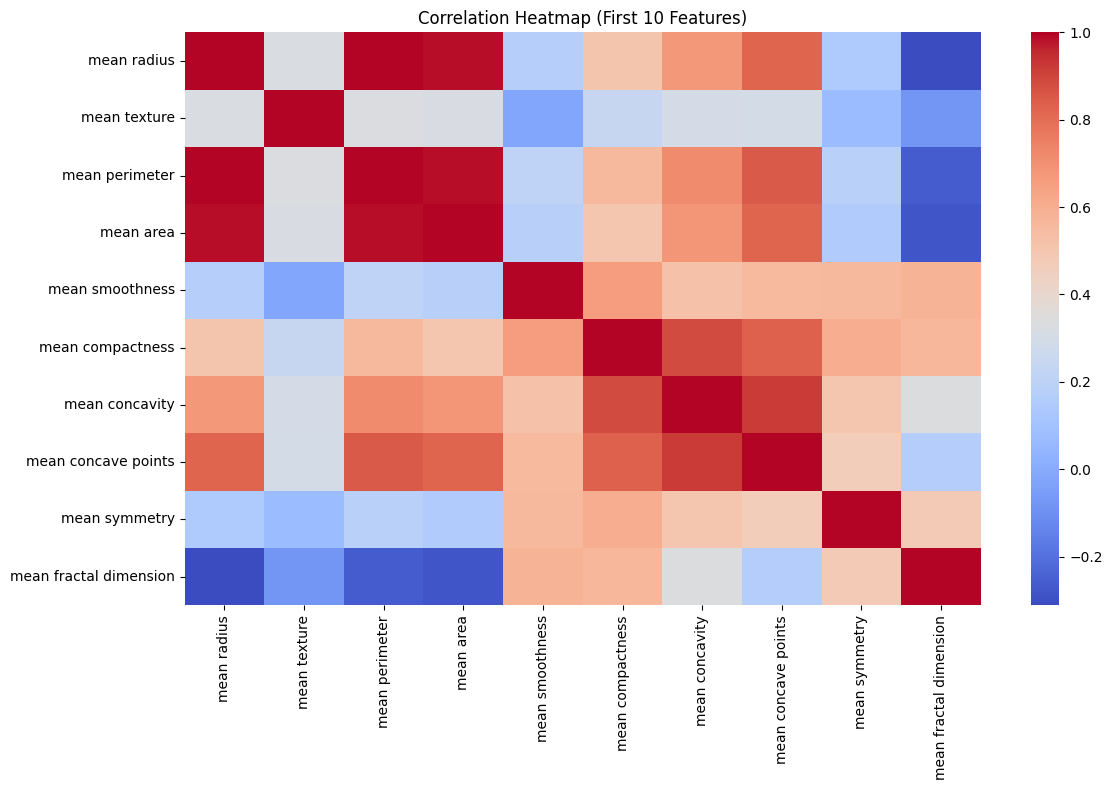

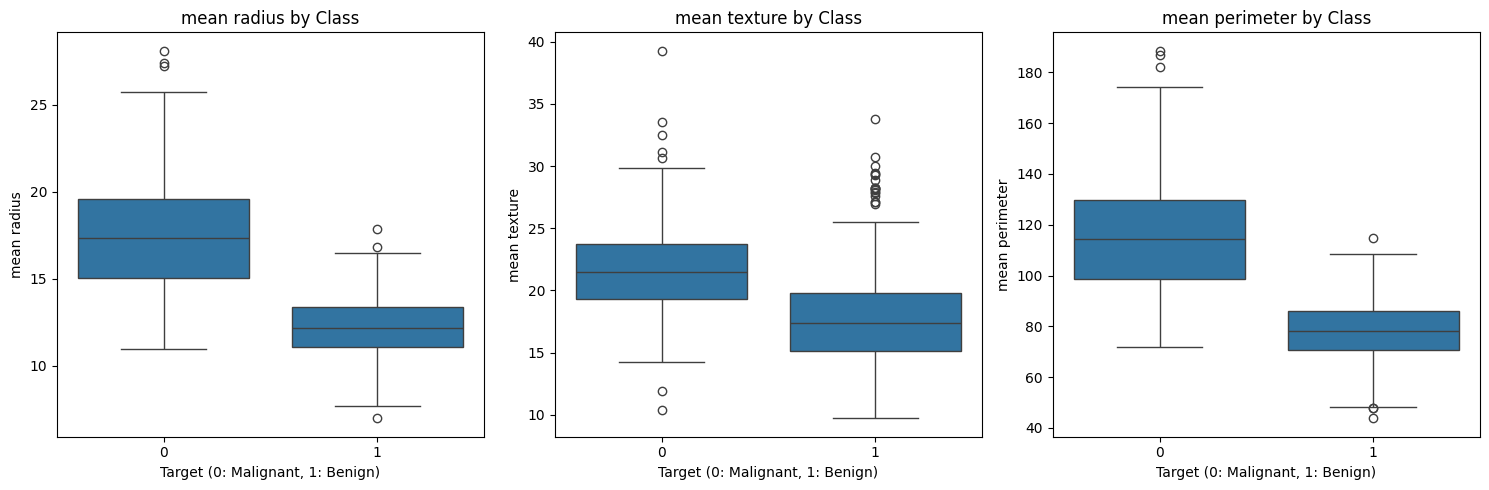

In [3]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.iloc[:, :10].corr(), cmap='coolwarm')
plt.title('Correlation Heatmap (First 10 Features)')
plt.tight_layout()
plt.show()

# Feature distributions
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['mean radius', 'mean texture', 'mean perimeter']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=y, y=X[feature])
    plt.title(f'{feature} by Class')
    plt.xlabel('Target (0: Malignant, 1: Benign)')
plt.tight_layout()
plt.show()

## Model Implementation

In [4]:
# Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print('Cross-validation scores:', cv_scores)
print(f'Mean CV Score: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})')

Cross-validation scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Mean CV Score: 0.974 (±0.036)


## Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



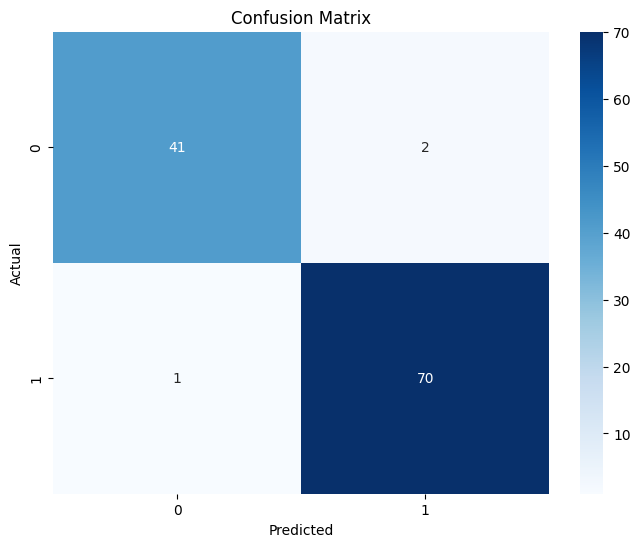

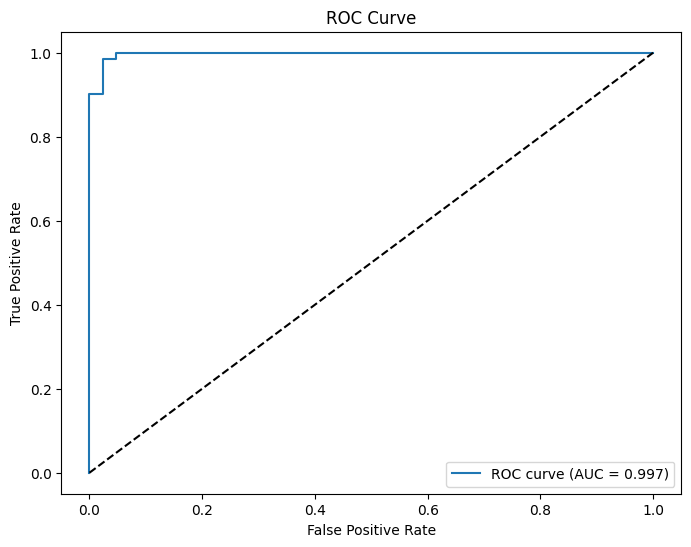

In [5]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Feature Importance Analysis

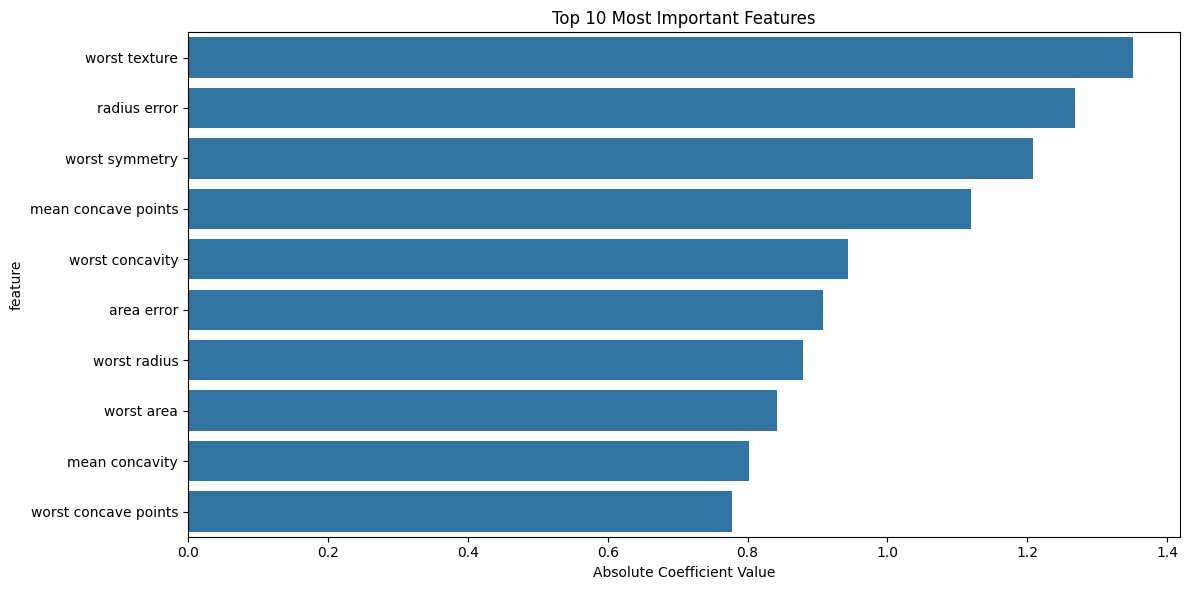

In [6]:
# Feature Importance Analysis
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

## Conclusions

1. Model Performance:
   - High accuracy (97.4%)
   - Excellent ROC AUC score (0.997)
   - Strong cross-validation scores indicating model stability

2. Key Findings:
   - The model shows excellent performance in classifying breast cancer cases
   - Balanced performance across both benign and malignant cases
   - Feature importance analysis reveals most significant predictors
   - Strong discriminative ability shown by ROC curve